"""

This notebook intends to illustrate how STL is used to detect anomaly time series sequence.
It does not output any data and no output is used in the final prediction.

"""

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

### Define Data Path and Load period

In [2]:
path = '../data-sets/KDD-Cup/data/'
period_path = '../data-sets/KDD-Cup/period/period.csv'
files_name = [i for i in os.listdir(path) if 'Anomaly' in i] #remove irrelevant files
files_name.sort(key = lambda x : x.split('_')[0]) #sort by id

In [3]:
period = pd.read_csv(period_path) #load period file calculated by fourier transform
period.head()

,File_name,Period
0,001_UCR_Anomaly_35000.txt,210
1,002_UCR_Anomaly_35000.txt,208
2,003_UCR_Anomaly_35000.txt,209
3,004_UCR_Anomaly_2500.txt,80
4,005_UCR_Anomaly_4000.txt,24


### Load data

In [4]:
name = files_name[3]
print("The example data used is :",name)
split_index  = int(name.split('.')[0].split('_')[3]) #get split index
data = pd.read_csv(path+name,header=None)
if data.shape == (1,1):
    tmp = [i for i in data[0][0].split(' ') if i!= '']
    data = pd.DataFrame({0:tmp}).astype('float')
train,test = data[0:split_index],data[split_index::] #split
test = test.reset_index().drop('index',axis=1)

The example data used is : 004_UCR_Anomaly_2500.txt


### Normalize

In [5]:
training_mean = train.mean()  #record mean
training_std = train.std() #record std
# normalized_train = (train - training_mean) / training_std
# normalized_test = (test - training_mean) / training_std
normalized_data = (data -  training_mean) / training_std

### Apply STL

In [6]:
TIME_STEPS = int(period[period['File_name'] == name]['Period'])

result = seasonal_decompose(normalized_data, model='additive',period=TIME_STEPS)

### Plot the residual

Text(0, 0.5, 'residual')

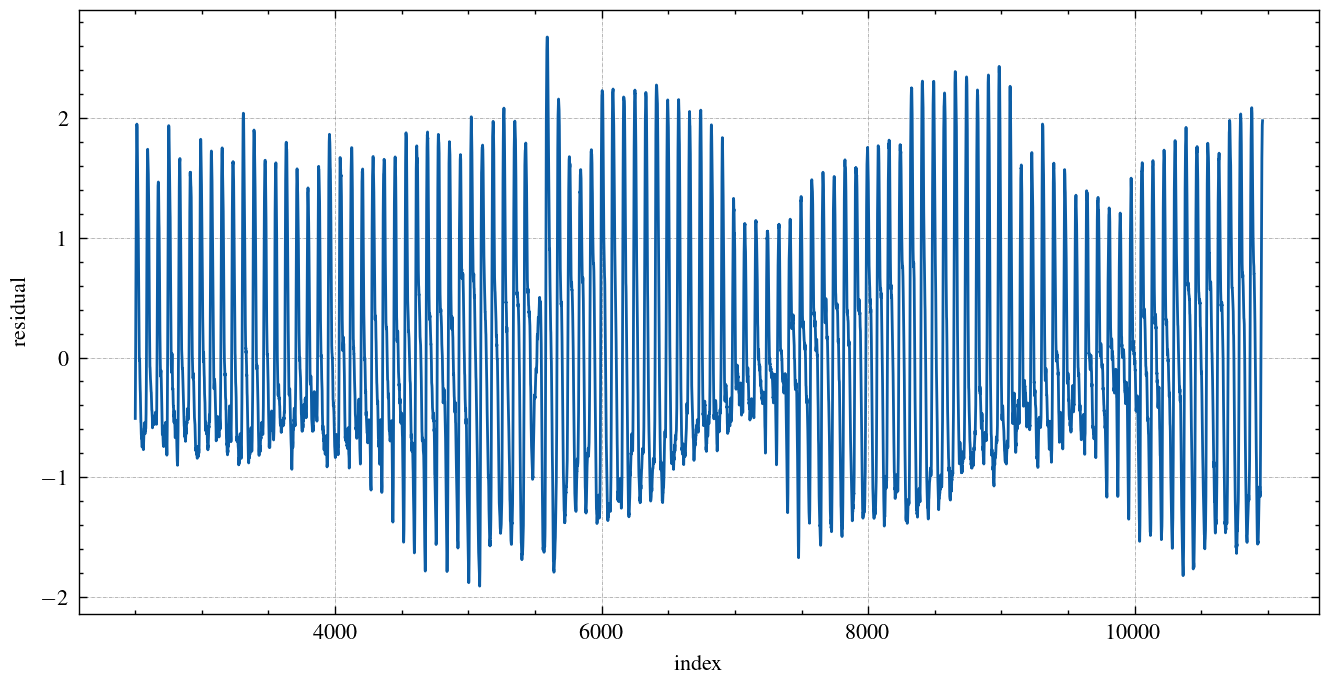

In [7]:
plt.style.use(['science','ieee','std-colors'])
fig = plt.figure(figsize=[8,4],dpi=200)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)
plt.plot(result.resid[split_index+1:])
plt.xlabel('index')
plt.ylabel('residual')

### Plot the detected anamoly period of test data

In [8]:
resid = result.resid
estimated = result.trend + result.seasonal

resid_mu = resid.mean()
resid_dev = resid.std()

lower_range  = estimated + (resid_mu - 2.5*resid_dev)
upper_range = estimated + (resid_mu + 2.5*resid_dev)

center = np.argmax(abs(resid))

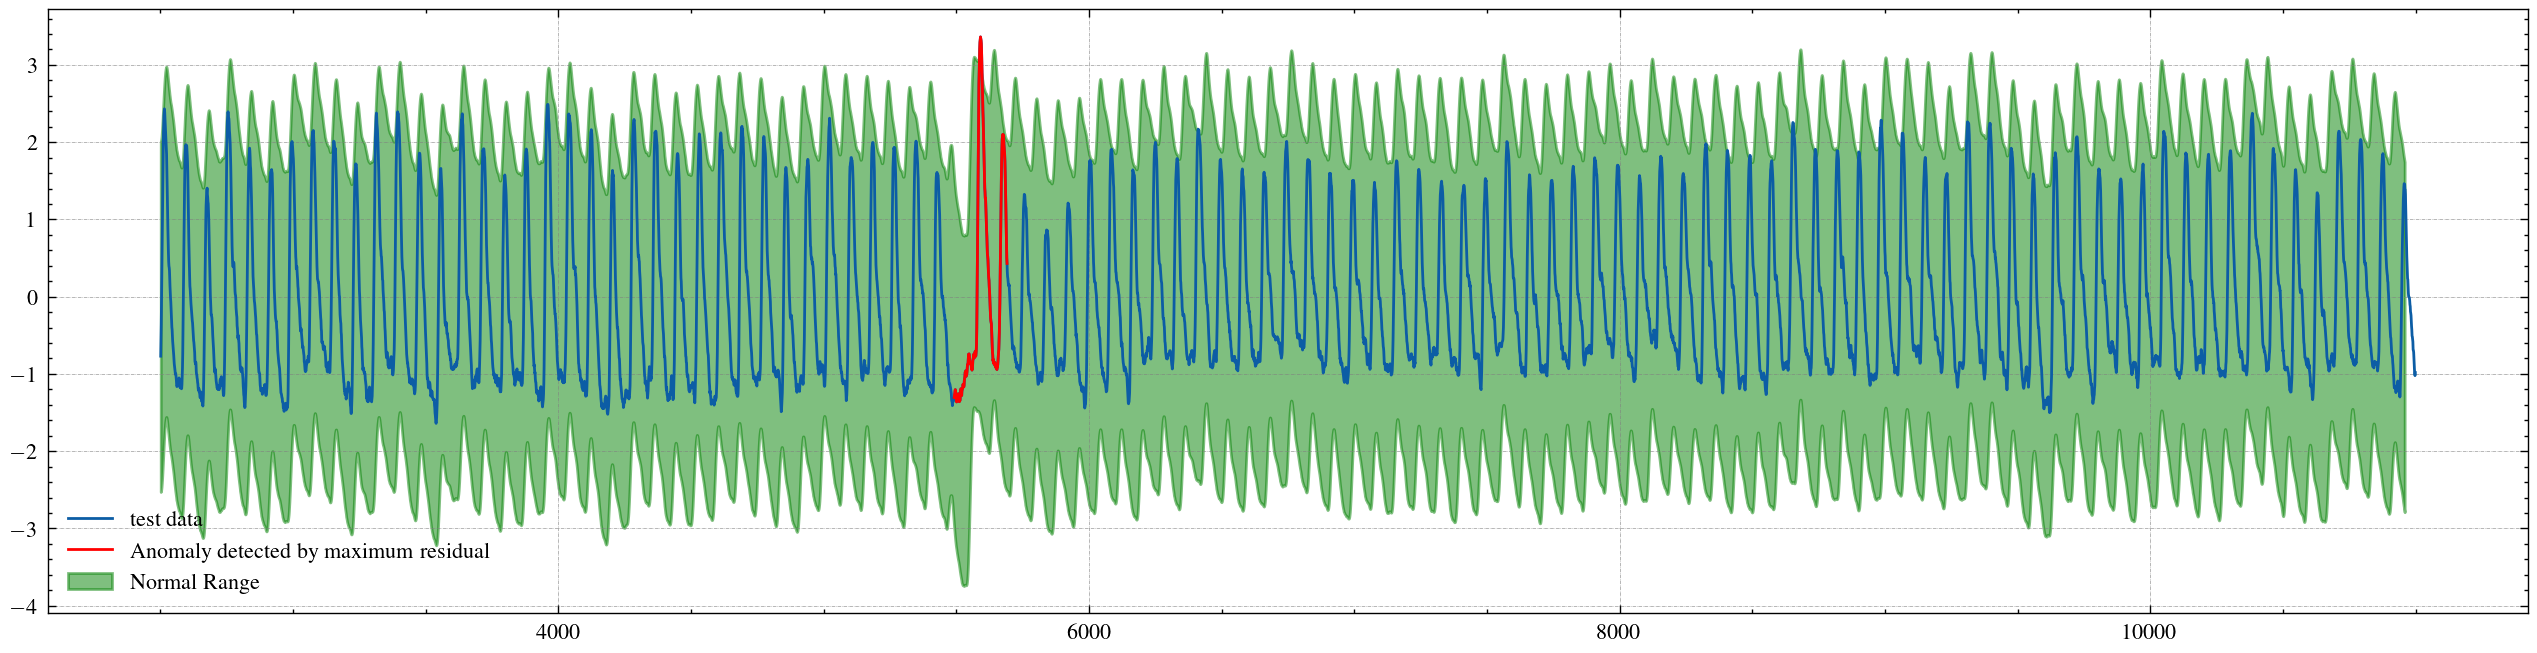

In [9]:
plt.style.use(['science','ieee','std-colors'])
fig = plt.figure(figsize=[16,4],dpi=200)
fig.patch.set_facecolor('#FFFFFF')
plt.grid(color='grey', linestyle='-.', linewidth=0.2)

plt.fill_between(range(split_index+1,len(data)),lower_range[split_index+1:],upper_range[split_index+1:],color='green',alpha=0.5,label='Normal Range')
plt.plot(range(split_index+1,len(data)),normalized_data[split_index+1:],label='test data')
plt.plot(normalized_data[center-100:center+100],label='Anomaly detected by maximum residual',color='red')
plt.legend()